# Home Run Logistic Regression Model

Using data from various base hits from the 2020 MLB season, fit a logistic regression model to predict whether or not a hit is a home run.

## Importing Data / Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
# Import data (credit: https://www.kaggle.com/jcraggy/baseball)
park_df = pd.read_csv('data/park_dimensions.csv')
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
# Display data
train_df.head()

,bip_id,game_date,home_team,away_team,batter_team,batter_name,pitcher_name,batter_id,pitcher_id,is_batter_lefty,...,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
0,1,2020-08-26,ARI,COL,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,1,0,1,2,-0.15,1.97,87.8,108.9,9.0,0
1,2,2020-08-10,COL,ARI,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,1,1,3,1,-0.71,2.88,95.2,NaN,18.0,0
2,3,2020-08-10,COL,ARI,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,3,0,1,2,-0.54,1.75,86.5,75.0,49.0,0
3,4,2020-08-26,ARI,COL,COL,"blackmon, charlie","ray, robbie",453568,592662,1,...,1,0,0,2,-0.42,3.15,86.7,90.6,54.0,0
4,5,2020-08-10,COL,ARI,COL,"blackmon, charlie","ray, robbie",453568,592662,1,...,1,1,1,0,0.18,3.27,96.1,NaN,6.0,0


In [4]:
# Display data
test_df.head()

,bip_id,game_date,home_team,away_team,batter_team,batter_name,pitcher_name,batter_id,pitcher_id,is_batter_lefty,...,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle
0,16,2021-06-23 00:00:00,MIA,TOR,MIA,"marte, starling","ray, robbie",516782,592662,0,...,14,6,0,2,1,-0.09,2.10,87.6,109.0,22.0
1,17,2021-06-23 00:00:00,MIA,TOR,MIA,"marte, starling","ray, robbie",516782,592662,0,...,14,1,1,1,2,0.67,1.71,88.4,25.5,NaN
2,18,2021-06-01 00:00:00,TOR,MIA,MIA,"marte, starling","ray, robbie",516782,592662,0,...,28,5,2,0,0,-0.50,2.61,89.1,94.2,NaN
3,19,2021-06-01 00:00:00,TOR,MIA,MIA,"marte, starling","ray, robbie",516782,592662,0,...,28,3,2,2,1,-0.45,1.78,90.4,83.1,NaN
4,32,2021-06-13 00:00:00,BOS,TOR,BOS,"hernandez, enrique","ray, robbie",571771,592662,0,...,3,5,2,0,0,0.26,2.29,90.1,108.1,NaN


In [5]:
# Getting column types
train_df.dtypes

bip_id                int64
game_date            object
home_team            object
away_team            object
batter_team          object
batter_name          object
pitcher_name         object
batter_id             int64
pitcher_id            int64
is_batter_lefty       int64
is_pitcher_lefty      int64
bb_type              object
bearing              object
pitch_name           object
park                  int64
inning                int64
outs_when_up          int64
balls                 int64
strikes               int64
plate_x             float64
plate_z             float64
pitch_mph           float64
launch_speed        float64
launch_angle        float64
is_home_run           int64
dtype: object

## Pre-Processing Data

In [6]:
# Removing unnecessary columns
train_df.drop(columns=['bip_id', 'game_date', 'home_team', 'away_team', 'batter_team', 'batter_name', 
                       'pitcher_name', 'batter_id', 'pitcher_id'], inplace=True)
test_df.drop(columns=['bip_id', 'game_date', 'home_team', 'away_team', 'batter_team', 'batter_name',
                       'pitcher_name', 'batter_id', 'pitcher_id'], inplace=True)
train_df.head()

,is_batter_lefty,is_pitcher_lefty,bb_type,bearing,pitch_name,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
0,0,1,line_drive,left,Slider,0,1,0,1,2,-0.15,1.97,87.8,108.9,9.0,0
1,0,1,line_drive,left,4-Seam Fastball,7,1,1,3,1,-0.71,2.88,95.2,NaN,18.0,0
2,0,1,popup,left,Slider,7,3,0,1,2,-0.54,1.75,86.5,75.0,49.0,0
3,1,1,fly_ball,right,Slider,0,1,0,0,2,-0.42,3.15,86.7,90.6,54.0,0
4,1,1,ground_ball,left,4-Seam Fastball,7,1,1,1,0,0.18,3.27,96.1,NaN,6.0,0


In [7]:
# Displaying number of rows for each dataset
print(len(train_df))
print(len(test_df))

46244
65779


In [8]:
# Drop null rows b/c null doesn't work well with log reg model fitting
train_df = train_df.dropna()
test_df = test_df.dropna()

# Displaying number of rows for each dataset to see if there is still good amount of data
print(len(train_df))
print(len(test_df))

25862
37010


In [9]:
# Determine the number of unique values in each column for one-hot encoding
train_df.nunique()

is_batter_lefty       2
is_pitcher_lefty      2
bb_type               4
bearing               3
pitch_name            8
park                 30
inning               13
outs_when_up          3
balls                 4
strikes               3
plate_x             344
plate_z             378
pitch_mph           322
launch_speed        906
launch_angle        179
is_home_run           2
dtype: int64

In [10]:
# Getting a list of columns with categorical data
cat_cols = train_df.dtypes[train_df.dtypes == "object"].index.tolist()
cat_cols

['bb_type', 'bearing', 'pitch_name']

In [11]:
# One-hot encoding categorical columns
train_encode_df = pd.get_dummies(train_df, columns=cat_cols)
test_encode_df = pd.get_dummies(test_df, columns=cat_cols)

train_encode_df.head()

,is_batter_lefty,is_pitcher_lefty,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,...,bearing_left,bearing_right,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Cutter,pitch_name_Knuckle Curve,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split-Finger
0,0,1,0,1,0,1,2,-0.15,1.97,87.8,...,1,0,0,0,0,0,0,0,1,0
2,0,1,7,3,0,1,2,-0.54,1.75,86.5,...,1,0,0,0,0,0,0,0,1,0
3,1,1,0,1,0,0,2,-0.42,3.15,86.7,...,0,1,0,0,0,0,0,0,1,0
5,1,1,7,3,0,2,2,-0.99,1.52,86.2,...,0,0,0,0,0,0,0,0,1,0
9,0,1,0,4,1,1,1,-0.44,2.33,85.5,...,1,0,0,0,0,0,0,0,1,0


In [12]:
test_encode_df.head()

,is_batter_lefty,is_pitcher_lefty,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,...,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Cutter,pitch_name_Fastball,pitch_name_Knuckle Curve,pitch_name_Knuckleball,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split-Finger
0,0,1,14,6,0,2,1,-0.09,2.10,87.6,...,0,0,0,0,0,0,0,0,1,0
5,0,1,3,3,2,0,1,0.48,2.43,96.5,...,1,0,0,0,0,0,0,0,0,0
6,0,1,28,5,1,0,0,-0.28,1.92,79.8,...,0,0,0,0,0,1,0,0,0,0
8,0,1,28,1,0,1,0,-0.39,2.90,95.1,...,1,0,0,0,0,0,0,0,0,0
9,0,1,26,3,0,0,2,-0.48,2.06,95.4,...,1,0,0,0,0,0,0,0,0,0


Uh oh, there's a column in the test dataset that isn't in the train dataset! Looks like there are data for knuckleball pitches based on the new `pitch_name_Knuckle` column. Let's further analyze...

In [13]:
# Getting count of knuckleball pitches
test_encode_df['pitch_name_Knuckleball'].value_counts()

0    37003
1        7
Name: pitch_name_Knuckleball, dtype: int64

Fortunately there are very few pitches that are knuckleballs. Because our training dataset doesn't have any of these values, we cannot fit a model using the rows where the pitch is a knuckleball, so we delete the corresponding rows and column in the test dataset:

In [14]:
# Delete rows with knuckleball pitches
test_encode_df = test_encode_df[test_encode_df['pitch_name_Knuckleball'] == 0]

In [15]:
# Getting count of knuckleball pitches
test_encode_df['pitch_name_Knuckleball'].value_counts()

0    37003
Name: pitch_name_Knuckleball, dtype: int64

In [16]:
# Delete knuckleball one-hot encoded column
del test_encode_df['pitch_name_Knuckleball']

In [17]:
# Check to see if the process worked
test_encode_df.head()

,is_batter_lefty,is_pitcher_lefty,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,...,bearing_right,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Cutter,pitch_name_Fastball,pitch_name_Knuckle Curve,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split-Finger
0,0,1,14,6,0,2,1,-0.09,2.10,87.6,...,0,0,0,0,0,0,0,0,1,0
5,0,1,3,3,2,0,1,0.48,2.43,96.5,...,0,1,0,0,0,0,0,0,0,0
6,0,1,28,5,1,0,0,-0.28,1.92,79.8,...,0,0,0,0,0,0,1,0,0,0
8,0,1,28,1,0,1,0,-0.39,2.90,95.1,...,0,1,0,0,0,0,0,0,0,0
9,0,1,26,3,0,0,2,-0.48,2.06,95.4,...,0,1,0,0,0,0,0,0,0,0


## Creating and Fitting the Model

In [18]:
# Split the data into predictor and prediction dataframes
y = train_encode_df["is_home_run"].values
X = train_encode_df.drop(["is_home_run"],1).values

# Split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Fit logistic regression model
model = LogisticRegression(random_state=69)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=69)

In [21]:
# Get accuracy on test data
model.score(X_test_scaled, y_test)

0.9554593257036808

In [22]:
# Display model coefficients
model.coef_

array([[ 4.84413925e-02,  1.26428668e-03, -3.06929155e-02,
        -6.02632348e-02,  2.33067480e-02, -5.28057818e-02,
         7.23961495e-02, -1.37991236e-01,  1.02444958e-01,
        -1.17925190e-01,  4.40141282e+00,  1.56701624e+00,
         1.24609750e+00, -1.51841249e+00,  1.01012191e+00,
        -8.21311811e-01,  2.15393512e-01, -1.37775335e-01,
        -9.61713134e-02, -8.51457367e-04,  8.84325853e-03,
         5.01705558e-02, -6.42602198e-02,  7.74584756e-02,
        -1.60794312e-02,  2.29022204e-03, -3.08460556e-02]])

In [23]:
# Display model intercept
model.intercept_

array([-9.36971638])

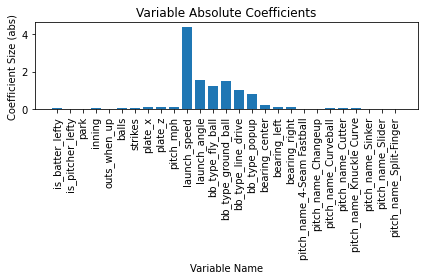

In [27]:
# Plot out absolute value of coefficients to determine "best predictors"
x_vals = train_encode_df.drop(["is_home_run"],1).columns.to_list()
y_vals = np.abs(model.coef_).tolist()[0]

plt.bar(x_vals, y_vals)
plt.xticks(rotation=90)
plt.xlabel('Variable Name')
plt.ylabel('Coefficient Size (abs)')
plt.title('Variable Absolute Coefficients')
plt.tight_layout()
plt.savefig('images/coeffs.png')

In conclusion, we can see that launch speed, launch_angle, and the type of hit (specifically if it is a ground ball or fly ball) are good predictors to determine if a hit is a home run.